In [2]:
import pandas as pd
import numpy as np
from numpy.linalg import eig
from scipy.linalg import eig 
import matplotlib.pyplot as plt
import seaborn as sn

In [3]:
data=np.array([[3,4],[5,7],[3,8],[0,4],[3,5]])

In [4]:
data

array([[3, 4],
       [5, 7],
       [3, 8],
       [0, 4],
       [3, 5]])

In [5]:
df=pd.DataFrame(data,columns=["math","english"])

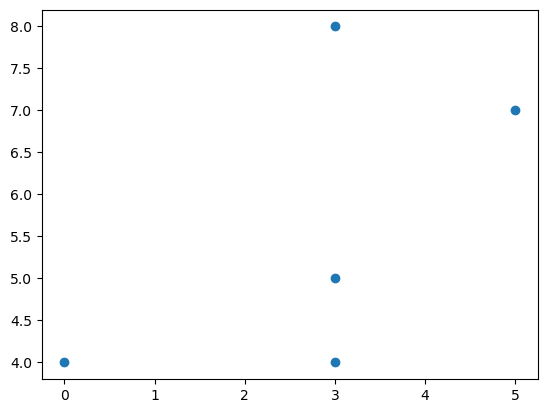

In [6]:
plt.scatter(df["math"],df["english"])

In [7]:
mean=np.mean(data,axis=0)

In [8]:
mean

array([2.8, 5.6])

In [10]:
scaled_val=data-mean

In [12]:
std_val=np.std(data,axis=0)

In [13]:
scaled_val/std_val

array([[ 0.125     , -0.98473193],
       [ 1.375     ,  0.86164044],
       [ 0.125     ,  1.47709789],
       [-1.75      , -0.98473193],
       [ 0.125     , -0.36927447]])

In [15]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
st.fit_transform(df)

array([[ 0.125     , -0.98473193],
       [ 1.375     ,  0.86164044],
       [ 0.125     ,  1.47709789],
       [-1.75      , -0.98473193],
       [ 0.125     , -0.36927447]])

In [34]:
cov=np.cov(scaled_val.T) # it is consider columnwize 

In [35]:
np.cov(scaled_val) # it perform rowize

array([[ 1.62,  0.72, -1.98, -1.08,  0.72],
       [ 0.72,  0.32, -0.88, -0.48,  0.32],
       [-1.98, -0.88,  2.42,  1.32, -0.88],
       [-1.08, -0.48,  1.32,  0.72, -0.48],
       [ 0.72,  0.32, -0.88, -0.48,  0.32]])

In [36]:
eig_value,eig_vector=eig(cov) #eigen vector 

In [37]:
eig_vector,eig_value

(array([[-0.71634722, -0.69774398],
        [ 0.69774398, -0.71634722]]),
 array([1.34934222+0.j, 5.15065778+0.j]))

In [52]:
eig_vector.T.dot(scaled_val.T).T #this is PCA : we multiply eigen vector to scaled_data 

array([[-1.25965981,  1.00660676],
       [-0.59912232, -2.53792286],
       [ 1.5313161 , -1.85878213],
       [ 0.88938185,  3.09983869],
       [-0.56191583,  0.29025954]])

In [53]:
from sklearn.decomposition import PCA

In [54]:
pca=PCA() # before creating object of the pca class we have to scaled the data

In [57]:
pd.DataFrame(data=pca.fit_transform(scaled_val),columns=["PC1","pc2"])

,PC1,pc2
0,1.006607,-1.259660
1,-2.537923,-0.599122
2,-1.858782,1.531316
3,3.099839,0.889382
4,0.290260,-0.561916


In [61]:
sum(pca.explained_variance_ratio_) # here i have added the pc1 and pc2 to get overall ratio

0.9999999999999999

In [71]:
df1=pd.read_csv(r"C:\Users\rajpu\OneDrive\Desktop\glass.data")

In [72]:
df1

,index,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [85]:
df1=df1.drop(['index',"Class"],axis=1)

In [86]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [87]:
St=StandardScaler()

In [97]:
st_data=St.fit_transform(df1)

In [102]:
pcal=PCA()
pd.DataFrame(pcal.fit_transform(st_data))

,0,1,2,3,4,5,6,7,8
0,1.151140,-0.529488,-0.372096,1.728901,-0.251936,0.340210,-0.395600,-0.197160,0.016346
1,-0.574137,-0.759788,-0.556708,0.760232,-0.257071,-0.115960,-0.024158,-0.284214,-0.010790
2,-0.940160,-0.929836,-0.554907,0.206254,-0.237506,0.126630,-0.367518,-0.095941,0.021640
3,-0.142083,-0.961677,-0.117125,0.415724,-0.476299,0.285805,-0.052497,-0.002959,0.092035
4,-0.351092,-1.091249,-0.485079,0.069102,-0.432090,0.298032,0.158570,-0.191316,0.002315
...,...,...,...,...,...,...,...,...,...
209,-2.383835,3.061677,0.090445,-0.376611,0.103227,0.231162,-1.320186,0.189401,-0.028657
210,-2.397652,3.108236,-1.117502,0.288454,0.624723,0.618056,0.582361,0.131651,-0.013663
211,-1.680246,3.284823,-0.930349,-0.171014,0.451687,1.247320,0.674122,-0.891710,0.046284
212,-2.369748,2.756873,-1.234701,-0.525285,0.515008,1.003352,0.678899,0.074460,-0.027301


In [103]:
pcal.fit_transform(st_data)

array([[ 1.15113957, -0.52948764, -0.37209565, ..., -0.39560005,
        -0.19716008,  0.01634649],
       [-0.57413717, -0.75978777, -0.55670817, ..., -0.02415793,
        -0.28421356, -0.0107898 ],
       [-0.94015972, -0.92983597, -0.55490744, ..., -0.36751757,
        -0.09594067,  0.02164019],
       ...,
       [-1.68024627,  3.28482346, -0.93034851, ...,  0.67412231,
        -0.89170969,  0.04628358],
       [-2.36974768,  2.7568728 , -1.23470076, ...,  0.67889932,
         0.07446015, -0.02730068],
       [-2.26264885,  3.02859155, -0.89084474, ...,  0.46246107,
         0.0633149 , -0.01944978]])

In [107]:
sum(pcal.explained_variance_ratio_)

0.9999999999999998

In [109]:
sorted(pcal.explained_variance_ratio_,reverse=True)[:8]

[0.27901819179456455,
 0.22778579831670398,
 0.1560937771094048,
 0.12865138291980238,
 0.10155580523615623,
 0.05862613252208685,
 0.04099538259055583,
 0.007094771974823584]

In [114]:
max(pcal.explained_variance_ratio_)*100

27.901819179456457

In [115]:
min(pcal.explained_variance_ratio_)*100

0.01787575359017249

In [116]:
sum(sorted(pcal.explained_variance_ratio_,reverse=True)[:8])

0.9998212424640981

In [121]:
sum(sorted(pcal.explained_variance_ratio_,reverse=True)[:6])# top 7 feature create more imapact than other features

0.9517310878987187

In [126]:
var=pcal.explained_variance_ratio_

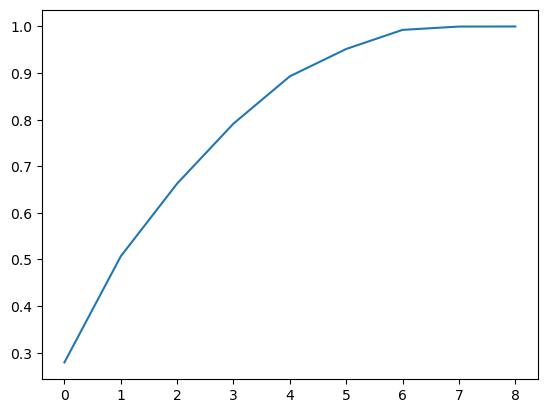

In [127]:
plt.plot(np.cumsum(var)) #top 7 features are creating more impact so will provide this feature instead others 
plt.show()